Building the Naive Bayes Classification on the Indian Open 2023 Match Data

c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7

Confusion Matrix:
 [[3 1]
 [1 2]]


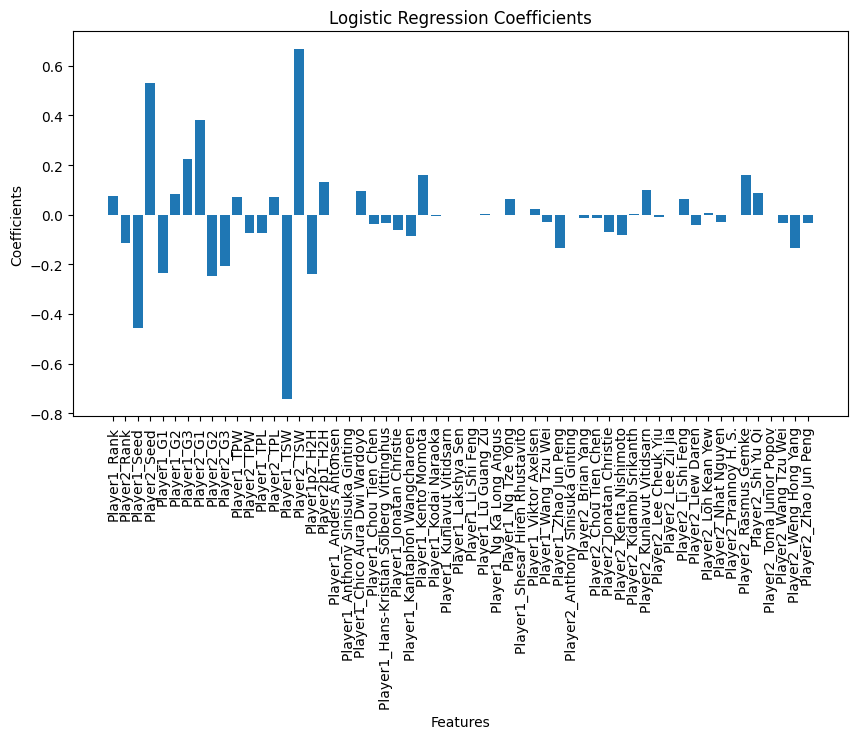

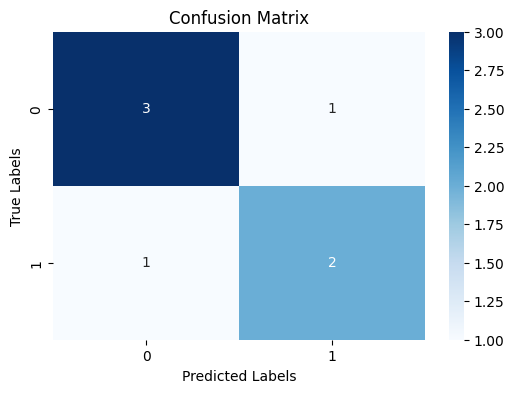

In [17]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Load the preprocessed data
data = pd.read_csv(r'C:\Users\rauna\BadmintonApp\Data_Handling\testing\match_data.csv')

# Separate the features and the target variable
X = data.drop('Winner', axis=1)
y = data['Winner']

# Convert the players to categorical variables using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
players_encoded = pd.DataFrame(encoder.fit_transform(X[['Player1', 'Player2']]))
players_encoded.columns = encoder.get_feature_names_out(['Player1', 'Player2'])
X = pd.concat([X.drop(['Player1', 'Player2'], axis=1), players_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results of the testing
print('Accuracy:', accuracy)
print('Classification Report:\n', report)
print('Confusion Matrix:\n', cm)

# Create a bar chart of the model's coefficients
plt.figure(figsize=(10, 5))
plt.bar(X.columns, model.coef_[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.show()

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
